## Experiment 7.2

##  Implement and demonstrate  Single, Multi variable and Polynomial Regression for a given set of training data stored in a .CSV file and evaluate the accuracy.

In [64]:
import pandas as pd  # For data manipulation
from sklearn.linear_model import LinearRegression  # For the linear regression model
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error  # For evaluating the model
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

# Load the dataset from a CSV file
df = pd.read_csv("Housing.csv")

# Initialize a LabelEncoder for encoding categorical columns
le = LabelEncoder()

# List of columns that need to be encoded
col_encode = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
]

# Encode each column in the list
for col in col_encode:
    df[col] = le.fit_transform(df[col])

# Separate the features (independent variables) and the target (dependent variable)
x = df.iloc[:, 1:]  # Features (all columns except the first one)
y = df.iloc[:, 0]  # Target (the first column)

# Split the data into training and testing sets (75% training, 25% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(x_test)
print("\nPredicted vs Actual Values(for 30 datas...):",'\n----------------------------')
for i in range(20):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")


# Output the model's intercept and coefficients
print(f'\nIntercept = {model.intercept_}')
print(f'Coefficients = {model.coef_}')

# Evaluate the model using Mean Squared Error (MSE)
print(f'Mean Square Error : {mean_squared_error(y_test, y_pred)}')

# Make a single prediction with the model using a new data point
y_pred1 = model.predict([[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0]])
print('Predicted value for Given Data : ',y_pred1)


Predicted vs Actual Values(for 30 datas...): 
----------------------------
Predicted: 7144776.26, Actual: 7700000.00
Predicted: 6455954.48, Actual: 7070000.00
Predicted: 7925694.83, Actual: 13300000.00
Predicted: 3313799.58, Actual: 3360000.00
Predicted: 4923273.53, Actual: 6083000.00
Predicted: 2850528.14, Actual: 1960000.00
Predicted: 4974060.43, Actual: 4200000.00
Predicted: 3872014.23, Actual: 4235000.00
Predicted: 6233391.53, Actual: 6160000.00
Predicted: 2992332.91, Actual: 2590000.00
Predicted: 6404423.36, Actual: 7700000.00
Predicted: 3294473.48, Actual: 4375000.00
Predicted: 3286682.72, Actual: 3920000.00
Predicted: 3021546.91, Actual: 3080000.00
Predicted: 7929474.39, Actual: 8463000.00
Predicted: 2523986.05, Actual: 2275000.00
Predicted: 5282553.65, Actual: 4473000.00
Predicted: 7342397.03, Actual: 9100000.00
Predicted: 4248987.74, Actual: 4480000.00
Predicted: 2812090.89, Actual: 2345000.00

Intercept = 486676.47286567464
Coefficients = [ 2.37160541e+02  1.93254511e+04  1.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Following are Additional Visualizations. Not Required in the Experiment

### Scatter Plot of Predictions vs. Actual Values

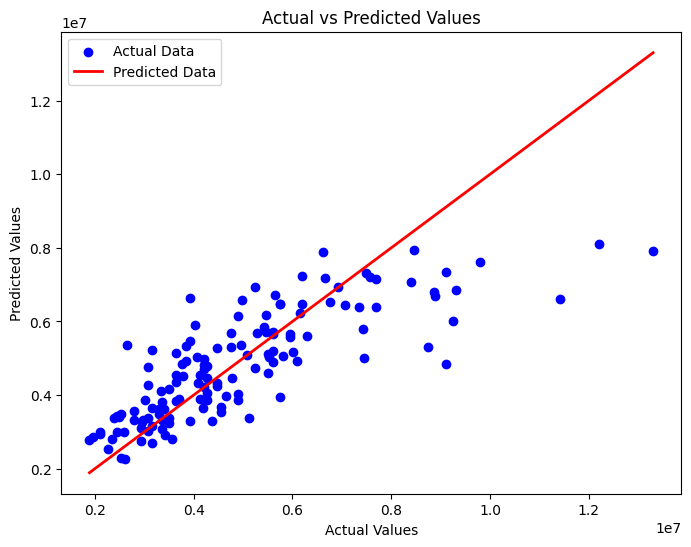

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue',label='Actual Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2,label='Predicted Data')  # 45-degree line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Residual Plot

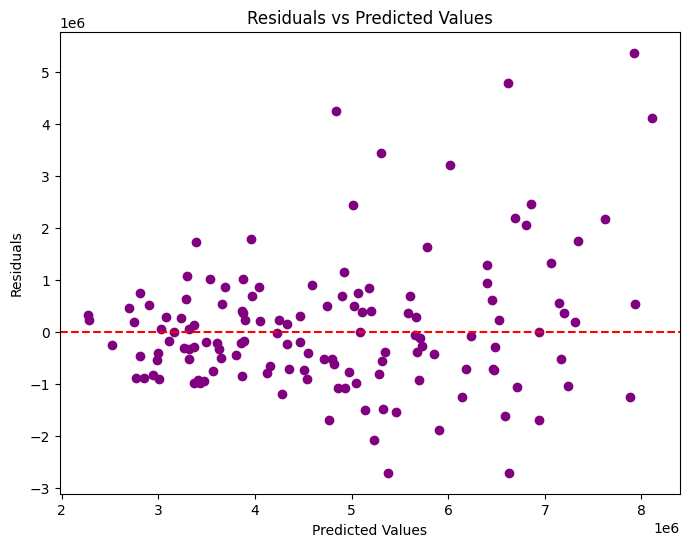

In [49]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple',label='Actual Data')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Feature Importance (Coefficients)

<Figure size 1000x600 with 0 Axes>

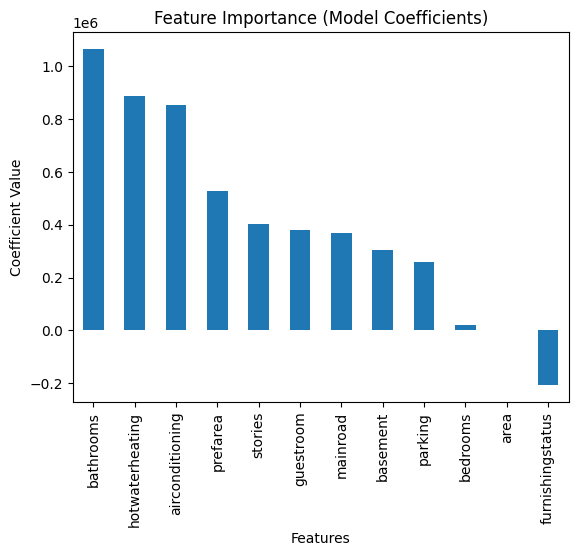

In [54]:
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])

plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Importance (Model Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


### Visualizing the Model on Simple Linear Regression

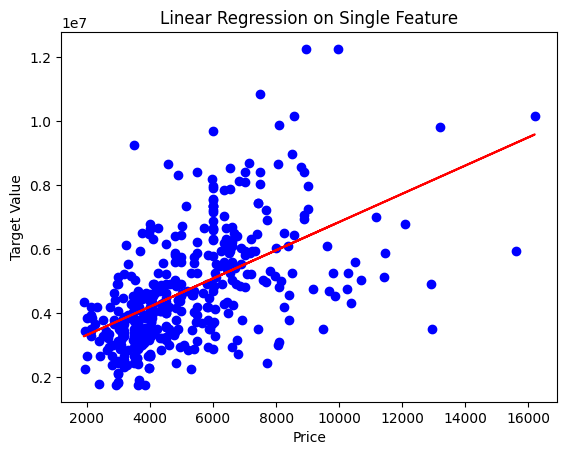

In [61]:
# If using a single feature for simplicity (e.g., feature at index 0)
x_single = x_train.iloc[:, 0].values.reshape(-1, 1)

# Train the model again on the single feature
model_single = LinearRegression()
model_single.fit(x_single, y_train)

# Plotting the regression line
plt.scatter(x_single, y_train, color='blue')
plt.plot(x_single, model_single.predict(x_single), color='red')
plt.title('Linear Regression on Single Feature')
plt.xlabel('Price')
plt.ylabel('Target Value')
plt.show()


### Cross-Validation Visualization (Advanced)

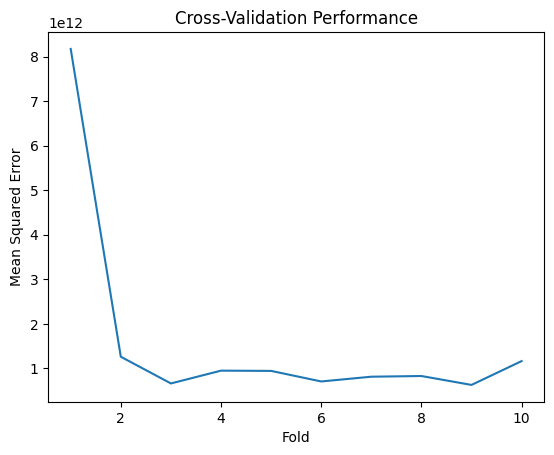

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error')
plt.plot(range(1, 11), -scores)
plt.title('Cross-Validation Performance')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.show()
